In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('scored_products.csv')
df.rename(columns={'total_biased_score' : 'biased_score',
                    'total_pos_score' : 'positive_biased_score', 'total_neg_score' : 'negative_biased_score'}, inplace=True)
df.head()

,product_id,seller_title,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
0,7602,برزان,112.047,350.146875,14.162069,44.256466,99.043,71.53100,27.51200
1,7602,برهان الکترونیک,3.001,300.100000,0.348276,34.827586,3.001,3.00100,0.00000
2,7602,به روز سنتر,10.003,500.150000,1.389655,69.482759,10.003,3.00100,7.00200
3,7602,جانبی انسی,32.012,320.120000,4.213793,42.137931,29.011,19.50725,9.50375
4,7602,جانبی حبیب,2.000,200.000000,0.241379,24.137931,2.000,2.00000,0.00000


In [7]:
df.describe()

,product_id,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
count,8.882470e+05,888247.000000,888247.000000,888247.000000,888247.000000,888247.000000,888247.000000,888247.000000
mean,4.299919e+06,20.104592,302.172414,2.550164,38.325682,17.002080,14.582023,2.420057
std,3.270761e+06,50.830454,213.918984,6.530933,30.253932,40.437721,35.699874,6.938348
min,7.602000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.598575e+06,3.001000,200.200000,0.348276,24.827586,3.000000,2.001000,0.000000
50%,3.568184e+06,6.002000,270.050000,0.734483,33.405172,5.003000,4.503000,0.000000
75%,6.790296e+06,16.002000,322.333333,1.989655,41.354966,13.507000,11.508000,2.501000
max,1.269403e+07,2331.517000,68800.300000,321.248276,9483.793103,702.727000,657.553190,312.655000


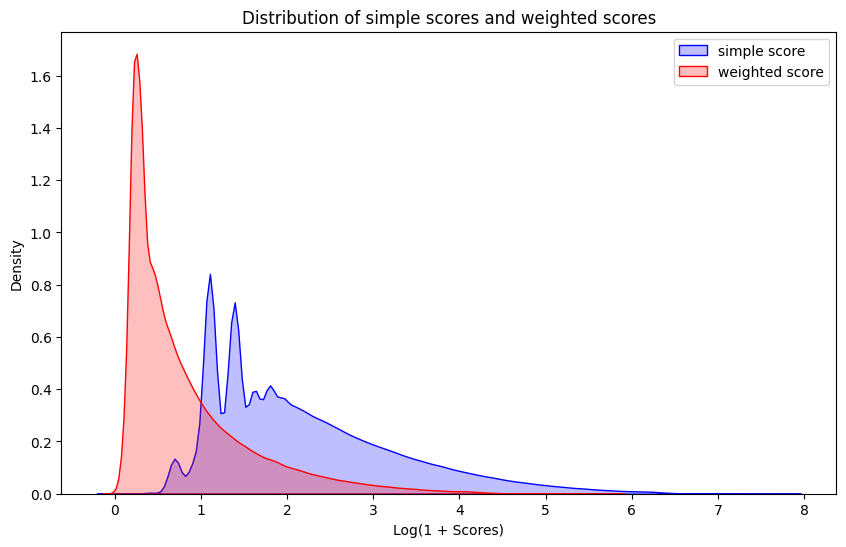

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log1p(df['simple_score']), fill=True, color="blue")
sns.kdeplot(np.log1p(df['weighted_score']), fill=True, color="red")

plt.title('Distribution of simple scores and weighted scores')
plt.xlabel('Log(1 + Scores)')
plt.ylabel('Density')
plt.legend(['simple score', 'weighted score'])
plt.show()

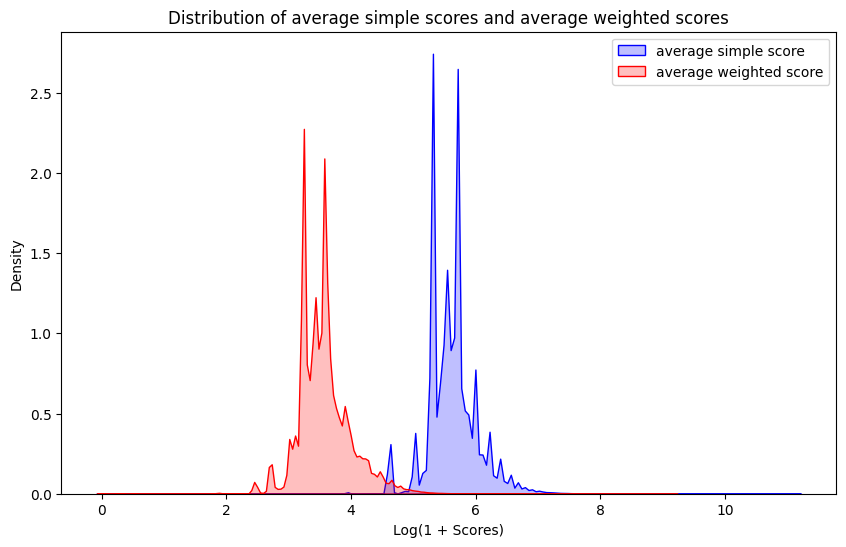

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log1p(df['avg_simple_score']), fill=True, color="blue")
sns.kdeplot(np.log1p(df['avg_weighted_score']), fill=True, color="red")

plt.title('Distribution of average simple scores and average weighted scores')
plt.xlabel('Log(1 + Scores)')
plt.ylabel('Density')
plt.legend(['average simple score', 'average weighted score'])
plt.show()

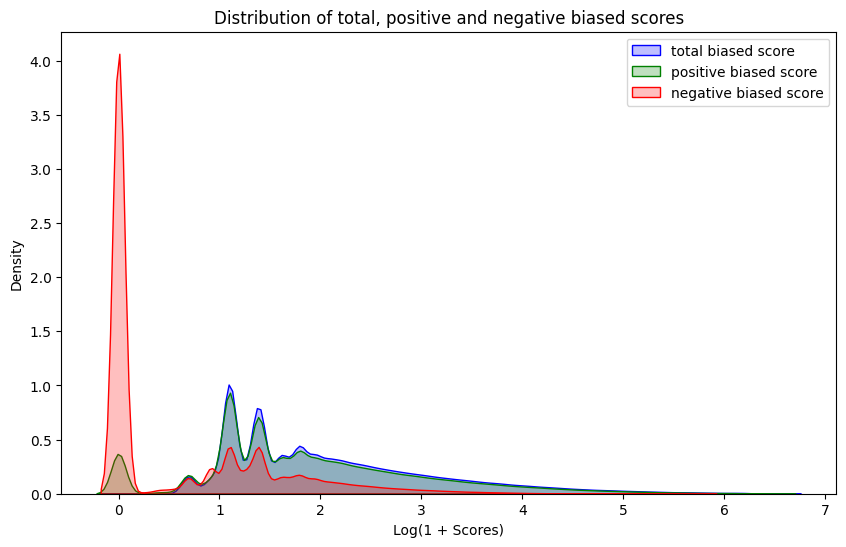

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log1p(df['biased_score']), fill=True, color="blue")
sns.kdeplot(np.log1p(df['positive_biased_score']), fill=True, color="green")
sns.kdeplot(np.log1p(df['negative_biased_score']), fill=True, color="red")

plt.title('Distribution of total, positive and negative biased scores')
plt.xlabel('Log(1 + Scores)')
plt.ylabel('Density')
plt.legend(['total biased score', 'positive biased score', 'negative biased score'])
plt.show()

In [3]:
proportions = pd.DataFrame({
    'product': df['product_id'],
    'positive_proportion': df['positive_biased_score'] / df['biased_score'],
    'negative_proportion': df['negative_biased_score'] / df['biased_score']
})

In [ ]:
plt.hist(df['positive_biased_score'], log=True)
plt.hist(df['negative_biased_score'], log=True, bottom= df['positive_biased_score'])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = range(len(df))

ax.bar(bar_positions, proportions['positive_proportion'], color='green')
ax.bar(bar_positions, proportions['negative_proportion'], bottom=proportions['positive_proportion'], color='red')

ax.set_xlabel('Product scores')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Positive and Negative Scores in Total Score by Product')
ax.legend(['positive proportion', 'negative proportion'])

plt.show()

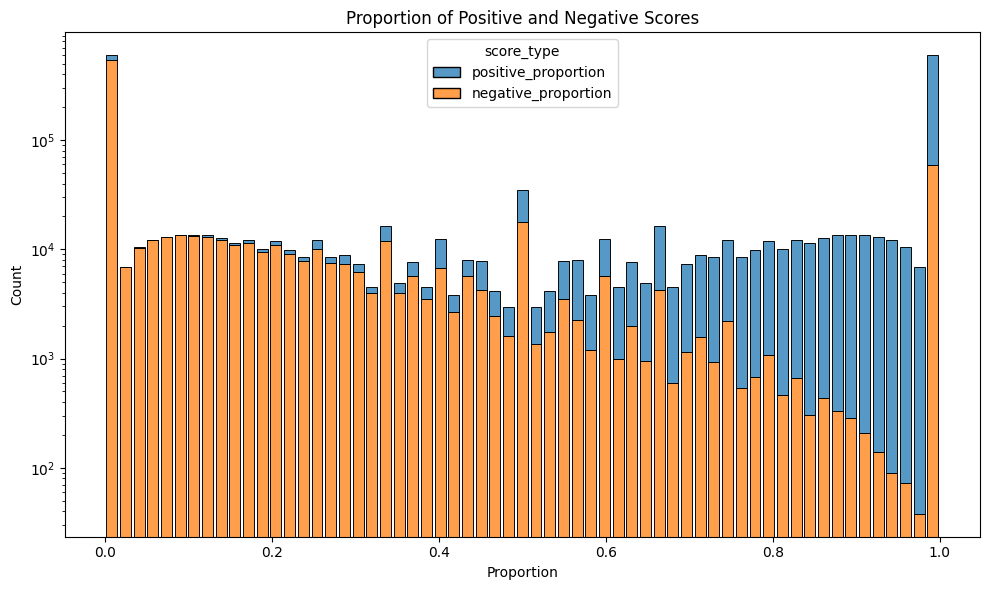

In [8]:
plt.figure(figsize=(10, 6))

df_melt = proportions.melt(id_vars='product', value_vars=['positive_proportion', 'negative_proportion'],
                           var_name='score_type', value_name='proportion')

sns.histplot(data=df_melt, x='proportion', hue='score_type', multiple='stack', shrink=0.8)
plt.yscale('log')
plt.title('Proportion of Positive and Negative Scores')
plt.xlabel('Proportion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
products = pd.read_csv('unique-digikala.csv')
products.rename(columns={'id':'product_id', 'Seller':'seller_title'}, inplace=True)
products_df = pd.merge(products, df, on=['product_id', 'seller_title'])
products_df.head()

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
0,12302,ساعت مچی دیجیتالی مردانه کاسیو جی شاک GD-100-1BDR,90,8,اکسسوری مردانه,ساعت مردانه,کاسیو,44154000.0,دیجی‌کالا,False,43063000.0,clothe,10.003,333.433333,1.217241,40.574713,7.003,7.0030,0.0000
1,12423,آلبوم موسیقی همین - رضا صادقی,82,27,موسیقی با کلام,NaN,آوای هنر,270000.0,نوین رایانه جانبی,False,0.0,book & stationary & art,13.003,260.060000,1.665517,33.310345,13.001,13.0010,0.0000
2,15327,تب سنج دیجیتال بیورر مدل FT90,82,92,تب سنج و دماسنج,NaN,بیورر,17250000.0,پزشکی اکسیژن,False,17100000.0,beauty,44.010,400.090909,5.758621,52.351097,29.008,24.9065,4.1015
3,16098,آموزش تصویری ارف کودکان نشر دنیای نرم افزار سینا,80,2,نرم افزار,مجموعه آموزشی,لوح گسترش دنیای نرم افزار,1500000.0,استریو تومبا,False,0.0,book & stationary & art,2.000,200.000000,0.241379,24.137931,2.000,2.0000,0.0000
4,18158,اتو مو رمینگتون مدل S1005,82,74,اتو و حالت دهنده ی مو,NaN,رمینگتون,14500000.0,اسپادان هوم,False,0.0,rural goods,4.502,225.100000,0.541379,27.068966,4.502,4.5020,0.0000


In [13]:
sample = products_df.sample(n= 100)
sample

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
177702,9041853,استند رومیزی کودک مدل گاهشمار سن کد MKids35Y-T...,94,3,تزئینات اتاق کودک,NaN,متفرقه,1800000.0,ماوراء,False,0.0,toys and kids,6.002,200.066667,0.731034,24.367816,6.002,6.002000,0.000000
16892,872593,ادوپرفیوم مردانه کریس آدامز مدل Active حجم 80 ...,76,6,عطر و ادکلن مردانه,NaN,کریس آدامز,11300000.0,پخش نیک آیین,False,0.0,beauty,4.001,200.050000,0.486207,24.310345,4.001,4.001000,0.000000
177663,9040661,مهره دستبند مدل حروف انگلیسی کد 463 بسته 200 عددی,72,5,اکسسوری زنانه و مردانه,ملزومات زیورآلات,متفرقه,420000.0,گالری گارنت,False,0.0,clothe,4.001,200.050000,0.486207,24.310345,4.001,2.000000,2.001000
9873,469057,استخر بادی کودک اینتکس مدل قلعه57122,74,32,وسایل بازی و تجهیزات پارکی کودک,تشک بازی، پارک بازی و تشک بادی,اینتکس,12200000.0,سامر,False,0.0,toys and kids,29.007,483.450000,3.782759,63.045977,17.006,7.667833,9.338167
100414,5214024,واریاسیون مو دوشس شماره E12 حجم 125 میلی لیتر ...,86,19,آرایش مو,رنگ مو,متفرقه,495000.0,مکس فور,False,0.0,beauty,10.004,200.080000,1.220690,24.413793,10.002,8.001000,2.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105963,5522864,کاغذ کادو مدل اداری بسته 5 عددی,0,0,ملزومات هدیه,کاغذ کادو,متفرقه,380000.0,لینو کالینو,False,0.0,book & stationary & art,2.000,200.000000,0.241379,24.137931,2.000,2.000000,0.000000
229535,11504877,ست تی شرت آستین کوتاه و شلوارک پسرانه مدل N89,0,0,پسرانه,لباس پسرانه,متفرقه,699000.0,نوین کالا,True,0.0,clothe,3.000,300.000000,0.344828,34.482759,3.000,3.000000,0.000000
120089,6315482,کفی تریکو بافی مدل مستطیل 15-7 بسته دو عددی,66,4,دست بافته‌ ها، رودوزی و محصولات پارچه ای و چرمی,ملزومات بافتنی,متفرقه,480000.0,گلدن پرشیا,False,0.0,book & stationary & art,4.001,400.100000,0.589655,58.965517,4.001,4.001000,0.000000
137492,7171462,شلوار نوزادی بی بی وان مدل 101 -23,94,3,نوزاد,لباس نوزاد,بی بی وان,1472500.0,نیروان,False,0.0,clothe,9.003,225.075000,1.079310,26.982759,9.002,9.002000,0.000000


In [28]:
sample = products_df[products_df['Category2'] == 'ساعت مردانه'].sample(n = 10)
sample

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
60521,3282603,ساعت مچی عقربه ای مردانه اسکمی مدل 1558S,48,7,اکسسوری مردانه,ساعت مردانه,اسکمی,12650000.0,فرنا بیوتی,False,0.0,clothe,5.001,500.100000,0.693103,69.310345,5.001,0.0000,5.0010
179690,9125212,ساعت مچی عقربه‌ای مردانه اوماکس مدل OCSM003I00D,94,4,اکسسوری مردانه,ساعت مردانه,اوماکس,26500000.0,آوا زمان گالری,False,14736000.0,clothe,3.001,300.100000,0.348276,34.827586,3.001,3.0010,0.0000
93148,4848863,ساعت مچی عقربه‌ای مردانه مگیر مدل MG2090,80,5,اکسسوری مردانه,ساعت مردانه,مگیر,16600000.0,اسکمی,False,0.0,clothe,22.009,550.225000,3.134483,78.362069,16.007,16.0070,0.0000
217199,10804352,ساعت مچی عقربه‌ای مردانه آکوا دی پولو مدل APSV...,20,1,اکسسوری مردانه,ساعت مردانه,آکوا دی پولو,8800000.0,دیجی‌کالا,False,3655000.0,clothe,3.003,300.300000,0.355172,35.517241,3.003,3.0030,0.0000
123523,6497626,ساعت مچی عقربه‌ای مردانه کورن واتچ مدل 8363,82,20,اکسسوری مردانه,ساعت مردانه,کورن واتچ,13200000.0,نارکو مد,False,0.0,clothe,3.001,300.100000,0.348276,34.827586,3.001,3.0010,0.0000
143646,7444448,ساعت مچی عقربه‌ای مردانه کاسیو مدل MTP-V002D-7...,90,13,اکسسوری مردانه,ساعت مردانه,کاسیو,12971000.0,دیجی‌کالا,False,10030000.0,clothe,54.519,495.627273,7.324138,66.583072,32.516,29.2640,3.2520
65475,3486674,ساعت مچی عقربه‌ای مردانه نیوی فورس مدل NF9097m,0,0,اکسسوری مردانه,ساعت مردانه,نیوی فورس,11500000.0,رهامه گالری,False,0.0,clothe,2.001,200.100000,0.244828,24.482759,2.001,2.0010,0.0000
70365,3706763,ساعت مچی عقربه‌ای مردانه اسکمی مدل 9096sl,82,23,اکسسوری مردانه,ساعت مردانه,اسکمی,10983800.0,فرنا بیوتی,False,9335600.0,clothe,57.019,570.190000,8.100000,81.000000,45.017,42.0155,3.0015
41246,2397407,ساعت مچی عقربه ای مردانه نیوی فورس مدل NF9074-BG,82,3,اکسسوری مردانه,ساعت مردانه,نیوی فورس,13900000.0,رهامه گالری,False,0.0,clothe,12.004,1200.400000,1.772414,177.241379,8.004,6.4032,1.6008
148112,7636044,ساعت مچی عقربه‌ای مردانه نیوی فورس مدل NF9135-...,60,2,اکسسوری مردانه,ساعت مردانه,نیوی فورس,15700000.0,رهامه گالری,False,0.0,clothe,3.001,300.100000,0.348276,34.827586,3.001,3.0010,0.0000


In [31]:
sample = products_df[products_df['Category1'] == 'کتاب شعر و ادبیات'].sample(n = 10)
sample

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
1537,67121,کتاب گیرنده شناخته نشد اثر کاترین کرسمن تیلور,72,40,کتاب شعر و ادبیات,NaN,نشر ماهی,349700.0,کوچه کتاب استور,False,0.0,book & stationary & art,7.005,233.500000,0.844828,28.160920,7.005,7.005,0.0
190124,9562557,کتاب پرتگاه و سه داستان دیگر اثر لیانید آندریف...,100,3,کتاب شعر و ادبیات,NaN,انتشارات گویا,332500.0,هادلند,False,280000.0,book & stationary & art,8.504,212.600000,1.031034,25.775862,8.504,8.504,0.0
78758,4124134,کتاب صدای فاصله ها اثر الهام حاج علی اصغری انت...,96,3,کتاب شعر و ادبیات,NaN,انتشارات نور گیتی,720000.0,انتشارات نور گیتی,False,0.0,book & stationary & art,6.001,300.050000,0.727586,36.379310,5.001,5.001,0.0
164750,8459207,کتاب و تنها باد می داند اثر ایمی هارمن نشر نون,84,10,کتاب شعر و ادبیات,NaN,نشر نون,945900.0,هادلند,False,0.0,book & stationary & art,11.005,366.833333,1.465517,48.850575,11.005,11.005,0.0
143636,7443961,کتاب فقط گوش کن اثر سارا دسن نشر نون,96,4,کتاب شعر و ادبیات,NaN,نشر نون,589800.0,هادلند,False,0.0,book & stationary & art,2.000,200.000000,0.241379,24.137931,2.000,2.000,0.0
84740,4403580,کتاب قتل با مسئولیت محدود اثر جک لندن انتشارات...,84,5,کتاب شعر و ادبیات,NaN,انتشارات مروارید,390000.0,کتاب سالم,False,0.0,book & stationary & art,3.001,300.100000,0.348276,34.827586,3.001,3.001,0.0
79600,4162137,کتاب کاربرد روان کاوی در نقد ادبی اثر زیگموند ...,94,26,کتاب شعر و ادبیات,NaN,انتشارات مروارید,695000.0,کتابکالا,False,0.0,book & stationary & art,18.511,205.677778,2.124138,23.601533,18.510,18.510,0.0
63679,3421013,کتاب The 5 AM Club اثر Robin Sharma انتشارات م...,76,10,کتاب شعر و ادبیات,NaN,انتشارات معیار علم,980000.0,دیلی و برادران,False,0.0,book & stationary & art,11.003,275.075000,1.424138,35.603448,11.003,8.003,3.0
28660,1766010,کتاب مرگ در ونیز اثر توماس مان نشر افق,90,31,کتاب شعر و ادبیات,NaN,نشر افق,652400.0,تهران کتاب,False,637700.0,book & stationary & art,3.002,300.200000,0.351724,35.172414,3.001,3.001,0.0
164690,8456042,کتاب سوسویی در تاریکی اثر استیسی ویلینگام نشر ...,100,1,کتاب شعر و ادبیات,NaN,نشر افرا,1980000.0,کتاب افرا,False,0.0,book & stationary & art,3.001,300.100000,0.348276,34.827586,3.001,3.001,0.0


In [24]:
sample = products_df[products_df['seller_title'] == 'دیجی‌کالا'].sample(n = 20)
sample

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
31185,1885139,عطر جیبی مردانه اسکلاره مدل Dnhil حجم 30 میلی ...,80,215,عطر جیبی,NaN,اسکلاره,639000.0,دیجی‌کالا,False,0.0,beauty,336.114,305.558182,42.220690,38.382445,311.099,261.079000,50.020000
204770,10206523,کفش زنانه چرم یلسان مدل تارا Tos-TRA-613-GN,0,0,کفش زنانه,کفش پاشنه دار زنانه,چرم یلسان,13710000.0,دیجی‌کالا,False,0.0,clothe,3.001,300.100000,0.348276,34.827586,3.000,3.000000,0.000000
237225,12124273,تی شرت آستین کوتاه بچگانه ایزی دو مدل 2181294-51,60,1,مد و پوشاک دخترانه و پسرانه,لباس دخترانه و پسرانه,ایزی دو,1990000.0,دیجی‌کالا,False,0.0,clothe,10.004,250.100000,1.186207,29.655172,10.004,10.004000,0.000000
199029,9887716,پلیور مردانه دیجی استایل اسنشیال مدل 249112459,76,23,لباس مردانه,ژاکت و پلیور مردانه,دیجی استایل اسنشیال,4590000.0,دیجی‌کالا,False,0.0,clothe,87.035,290.116667,11.120690,37.068966,65.030,48.690333,16.339667
67818,3586212,کفش روزمره مردانه گلسار مدل 7F01E503129,80,2,کفش مردانه,کفش روزمره مردانه,آذر گلسار,6984000.0,دیجی‌کالا,False,0.0,clothe,2.001,200.100000,0.244828,24.482759,2.001,2.001000,0.000000
187344,9456257,لیوان آموزشی کودک پینو بیبی مدل Natural sense ...,92,38,قاشق، چنگال و ظروف کودک و نوزاد,NaN,پینو بیبی,1300000.0,دیجی‌کالا,False,995000.0,toys and kids,143.560,292.979592,17.741379,36.206897,124.555,124.254900,0.300100
164725,8456981,شامپو بدن کرمی هیدرودرم مدل Tropical Fruits حج...,90,69,بهداشت و مراقبت بدن,شامپو بدن,هیدرودرم,596000.0,دیجی‌کالا,False,0.0,beauty,70.518,306.600000,9.079310,39.475262,62.514,62.514000,0.000000
235042,11956044,کیف رودوشی زنانه چرم مشهد مدل S0878-001,0,0,اکسسوری زنانه,کیف زنانه,چرم مشهد,12053000.0,دیجی‌کالا,False,12455000.0,clothe,3.502,350.200000,0.437931,43.793103,2.502,0.000000,2.502000
151209,7807817,تی شرت نوزادی دخترانه ال سی وایکیکی مدل 1S1845...,84,5,نوزاد,لباس نوزاد,ال سی وایکیکی,1690000.0,دیجی‌کالا,False,0.0,clothe,3.001,300.100000,0.348276,34.827586,3.001,0.000000,3.001000
30583,1856417,ساعت مچی عقربه ای مردانه کاسیو مدل MW-240-7EVDF,92,23,اکسسوری مردانه,ساعت مردانه,کاسیو,6922000.0,دیجی‌کالا,False,7166000.0,clothe,24.007,480.140000,3.334483,66.689655,18.007,18.007000,0.000000


In [21]:
sample = products_df[(products_df['Price'] >= 1000000) & (products_df['Price'] <= 2000000)].sample(n=20)
sample

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
42499,2458437,سویشرت زنانه طرح فیل کد R04,100,1,لباس زنانه,سویشرت زنانه,متفرقه,1689000.0,نوین کالا,False,0.0,clothe,2.002,200.200000,0.248276,24.827586,2.002,2.002000,0.000000
96443,5015669,کتاب دیوان و سفرنامه ناصر خسرو اثر حکیم ابومعی...,96,7,کتاب شعر و ادبیات,NaN,انتشارات پیر امید,1800000.0,کتاب کومه,False,0.0,book & stationary & art,3.002,150.100000,0.386207,19.310345,3.002,3.002000,0.000000
193457,9687397,ماسک مو نیترو پلاس مدل MACADAMA حجم 500 میلی لیتر,50,2,شامپو و مراقبت مو,ماسک و مراقبت مو,نیترو پلاس,1850000.0,چیکا مارکت,False,0.0,beauty,3.501,175.050000,0.434483,21.724138,3.501,3.501000,0.000000
36190,2144133,کتاب دختر خاندان گات 1 اثر کریس ریدل انتشارات ...,86,27,کتاب کودک و نوجوان,NaN,هوپا,1022200.0,کتابکالا,False,0.0,book & stationary & art,6.504,325.200000,0.858621,42.931034,3.503,3.503000,0.000000
204616,10193625,شامپو بدن مای مدل Floral Dance حجم 420 میلی لی...,90,6,بهداشت و مراقبت بدن,شامپو بدن,مای,1130000.0,بازرگانی مهوان,False,0.0,beauty,3.000,300.000000,0.344828,34.482759,3.000,3.000000,0.000000
46933,2665259,پودر دکلره آرکانوم مدل Ice وزن 400 گرم,76,19,آرایش مو,بی رنگ کننده مو,متفرقه,1480000.0,پخش آرکا مارکت,False,0.0,beauty,6.004,200.133333,0.737931,24.597701,6.004,6.004000,0.000000
6380,249155,کتاب واژگان خیلی ضروری آزمون تافل بر اساس ESSE...,88,191,کتاب زبان,NaN,انتشارات شباهنگ,1533200.0,کتابکالا,False,980000.0,book & stationary & art,41.514,415.140000,5.444828,54.448276,34.512,34.512000,0.000000
169477,8666769,دهان بازکن دندانپزشکی گلدن بیوتی مدل RC کد 01 ...,80,5,تجهیزات دندانپزشکی,NaN,متفرقه,1029900.0,گلد بیوتی سنتر,False,0.0,beauty,6.506,325.300000,0.865517,43.275862,3.506,0.667333,2.838667
30309,1843032,محلول تقویت کننده مو سپیژن مدل CPG004 حجم 40 م...,80,6,شامپو و مراقبت مو,تقویت کننده مو,سپیژن,1800000.0,نوریانی استور,False,0.0,beauty,1.502,150.200000,0.196552,19.655172,1.502,0.000000,1.502000
32385,1934806,بازی فکری زرافه مدل بچه ها دبرنا,86,27,اسباب بازی,فکری و آموزشی,متفرقه,1150000.0,فکرچین,False,0.0,toys and kids,8.508,212.700000,1.010345,25.258621,8.507,7.002000,1.505000


In [22]:
sample = products_df[~products_df['Is_Fake']].sample(n=10)
sample

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
228801,11457623,شلوار زنانه مدل ابر و بادی گشاد پشت کش دار توش...,74,17,لباس زنانه,شلوار و سرهمی زنانه,متفرقه,1512000.0,مهربانو مد روز,False,0.0,clothe,8.005,400.250000,0.982759,49.137931,6.005,4.002333,2.002667
31692,1906498,تاپ مردانه طرح موتور کد SM144,76,10,لباس مردانه,تاپ مردانه,متفرقه,499000.0,زامیاد,False,0.0,clothe,23.008,328.685714,2.993103,42.758621,23.008,23.008000,0.000000
141511,7356282,کرم مرطوب کننده نئودرم مدل هیدروسنس حجم 150 می...,88,154,مراقبت پوست,کرم مرطوب کننده و نرم کننده,نئودرم,1272100.0,گارمنتز,False,0.0,beauty,27.009,540.180000,3.582759,71.655172,18.009,16.132750,1.876250
184658,9331423,سوتین زنانه دکسونری مدل 125002705,74,15,لباس زنانه,لباس زیر زنانه,دکسونری,940000.0,دلیچی,False,920000.0,clothe,30.513,234.715385,3.682759,28.328912,29.511,24.509000,5.002000
114255,5987988,شابلون مدل سماع کد 2,84,5,ابزار طراحی و مهندسی,خط کش,متفرقه,750000.0,گنبد کبود,False,0.0,book & stationary & art,26.006,433.433333,3.400000,56.666667,11.006,10.756000,0.250000
77209,4046063,فرش ماشینی بزرگمهر مدل شگی کد S202 زمینه نسکاف...,80,1,فرش,فرش ماشینی,فرش بزرگمهر,4000000.0,جامه فرش,False,0.0,book & stationary & art,3.003,300.300000,0.355172,35.517241,3.003,3.003000,0.000000
212315,10596222,گیره کاغذ پنتر مدل روکش رنگی بسته 100 عددی,70,4,لوازم اداری,اقلام مصرفی لوازم اداری,پنتر,334800.0,اداری کالا,False,0.0,book & stationary & art,15.003,250.050000,1.837931,30.632184,15.003,15.003000,0.000000
171896,8777891,نیم تنه زنانه مدل تاپلکس,0,0,لباس زنانه,تاپ و نیم تنه زنانه,متفرقه,4550000.0,مارمارا,False,4500000.0,clothe,10.502,350.066667,1.300000,43.333333,7.502,6.251500,1.250500
163162,8386078,کتاب خواهر خوانده اثر جنیفر دانلی انتشارات پرتقال,92,41,کتاب کودک و نوجوان,NaN,انتشارات پرتقال,1964600.0,کتابکالا,False,1610000.0,book & stationary & art,53.015,441.791667,7.051724,58.764368,37.013,37.013000,0.000000
92731,4827837,کفش دخترانه مدل PK.3182,90,8,دخترانه,کفش دخترانه,متفرقه,1890000.0,نستور,False,0.0,clothe,19.009,237.612500,2.272414,28.405172,19.007,19.007000,0.000000


In [23]:
sample = products_df[products_df['Brand'] == 'آریا'].sample(n = 10)
sample

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,biased_score,positive_biased_score,negative_biased_score
55337,3044082,خمیربازی آریا مدل 1048 بسته 10 عددی,84,277,اسباب بازی,فکری و آموزشی,آریا,400000.0,نوشت افزار اوستا,False,336000.0,toys and kids,34.010,283.416667,4.034483,33.620690,32.009,28.5085,3.5005
24147,1517800,ظرف غذا 4 تکه کودک آریا مدلBDA3,90,5,قاشق، چنگال و ظروف کودک و نوزاد,NaN,آریا,750000.0,ایران تحریر شاپ,False,0.0,toys and kids,3.001,300.100000,0.348276,34.827586,3.001,3.0010,0.0000
86672,4488985,گواش 6 رنگ آریا مدل 4009 کد 103895,86,37,ابزار نقاشی و رنگ آمیزی,آبرنگ و گواش,آریا,740000.0,آرکا تحریر,False,0.0,book & stationary & art,10.001,250.025000,1.313793,32.844828,9.000,9.0000,0.0000
8352,368722,پاستل روغنی 18 رنگ آریا مدل 2030,86,161,ابزار نقاشی و رنگ آمیزی,پاستل و مداد شمعی,آریا,748700.0,باز بازی,False,0.0,book & stationary & art,141.056,261.214815,17.710345,32.796935,126.048,124.0480,2.0000
7156,317232,خمیر شنی آریا مدل 1080,86,376,اسباب بازی,فکری و آموزشی,آریا,1998000.0,تحریر هلیا,False,0.0,toys and kids,3.002,300.200000,0.351724,35.172414,3.002,3.0020,0.0000
106317,5553529,مداد آریا کد ۲۰۱ بسته ۶ عددی,86,59,نوشت افزار,مداد,آریا,380000.0,ماه بوک,False,359000.0,book & stationary & art,11.003,220.060000,1.320690,26.413793,11.001,11.0010,0.0000
71459,3769069,گواش پیوسته 6 رنگی آریا کد 4009,88,96,ابزار نقاشی و رنگ آمیزی,آبرنگ و گواش,آریا,498000.0,دیجی‌کالا,False,498000.0,book & stationary & art,44.015,244.527778,5.362069,29.789272,44.011,42.0110,2.0000
95218,4948372,آبرنگ 12 رنگ آریا کد ۵۰۰۵,88,58,ابزار نقاشی و رنگ آمیزی,آبرنگ و گواش,آریا,550000.0,ایران تحریر شاپ,False,0.0,book & stationary & art,36.017,225.106250,4.472414,27.952586,36.015,34.0120,2.0030
128460,6766417,چسب ماتیکی آریا مدل 8040,78,16,لوازم اداری,چسب,آریا,240000.0,دیجی‌کالا,False,0.0,book & stationary & art,7.002,233.400000,0.834483,27.816092,7.001,7.0010,0.0000
56842,3110378,ظرف غذای 4 تکه کودک آریا کد 6023 طرح دختر مو ف...,88,5,قاشق، چنگال و ظروف کودک و نوزاد,NaN,آریا,980000.0,تحریر هلیا,False,0.0,toys and kids,8.504,212.600000,1.031034,25.775862,8.503,8.5030,0.0000


In [58]:
scores = products_df.groupby('sub_category')['biased_score'].sum().reset_index()
max_score = scores.loc[scores['biased_score'].idxmax()]
min_score = scores.loc[scores['biased_score'].idxmin()]
print('Use biased score:')
print(f"sub category with maximum total score: {max_score['sub_category']}, with score {max_score['biased_score']}")
print(f"sub category with minimum total score: {min_score['sub_category']}, with score {min_score['biased_score']}")

scores = products_df.groupby('sub_category')['avg_weighted_score'].sum().reset_index()
max_score = scores.loc[scores['avg_weighted_score'].idxmax()]
min_score = scores.loc[scores['avg_weighted_score'].idxmin()]
print('use average weighted score:')
print(f"sub category with maximum total score: {max_score['sub_category']}, with score {max_score['avg_weighted_score']}")
print(f"sub category with minimum total score: {min_score['sub_category']}, with score {min_score['avg_weighted_score']}")

Use biased score:
sub category with maximum total score: clothe, with score 2043591.751
sub category with minimum total score: rural goods, with score 110845.768
use average weighted score:
sub category with maximum total score: clothe, with score 3834268.5064631784
sub category with minimum total score: travel, with score 186420.388199317


In [60]:
scores = products_df.groupby('Category1')['biased_score'].sum().reset_index()
max_score = scores.loc[scores['biased_score'].idxmax()]
min_score = scores.loc[scores['biased_score'].idxmin()]
print('use biased score:')
print(f"Category1 with maximum total score: {max_score['Category1']}, with score {max_score['biased_score']}")
print(f"Category1 with minimum total score: {min_score['Category1']}, with score {min_score['biased_score']}")

scores = products_df.groupby('Category1')['avg_weighted_score'].sum().reset_index()
max_score = scores.loc[scores['avg_weighted_score'].idxmax()]
min_score = scores.loc[scores['avg_weighted_score'].idxmin()]
print('use average weighted score:')
print(f"Category1 with maximum total score: {max_score['Category1']}, with score {max_score['avg_weighted_score']}")
print(f"Category1 with minimum total score: {min_score['Category1']}, with score {min_score['avg_weighted_score']}")

use biased score:
Category1 with maximum total score: لباس مردانه, with score 428985.543
Category1 with minimum total score: غذاساز و بخارپز کودک و نوزاد, with score 1.002
use average weighted score:
Category1 with maximum total score: لباس زنانه, with score 708091.6635813484
Category1 with minimum total score: غذاساز و بخارپز کودک و نوزاد, with score 14.482758620689657


In [61]:
scores = products_df.groupby('Category2')['biased_score'].sum().reset_index()
max_score = scores.loc[scores['biased_score'].idxmax()]
min_score = scores.loc[scores['biased_score'].idxmin()]
print('use biased score:')
print(f"Category2 with maximum total score: {max_score['Category2']}, with score {max_score['biased_score']}")
print(f"Category2 with minimum total score: {min_score['Category2']}, with score {min_score['biased_score']}")

scores = products_df.groupby('Category2')['avg_weighted_score'].sum().reset_index()
max_score = scores.loc[scores['avg_weighted_score'].idxmax()]
min_score = scores.loc[scores['avg_weighted_score'].idxmin()]
print('use average weighted score:')
print(f"Category2 with maximum total score: {max_score['Category2']}, with score {max_score['avg_weighted_score']}")
print(f"Category2 with minimum total score: {min_score['Category2']}, with score {min_score['avg_weighted_score']}")

use biased score:
Category2 with maximum total score: فکری و آموزشی, with score 151514.182
Category2 with minimum total score: درامز, with score 2.001
use average weighted score:
Category2 with maximum total score: فکری و آموزشی, with score 251213.31471754675
Category2 with minimum total score: درامز, with score 24.48275862068965


In [62]:
scores = products_df.groupby('Brand')['biased_score'].sum().reset_index()
max_score = scores.loc[scores['biased_score'].idxmax()]
min_score = scores.loc[scores['biased_score'].idxmin()]
print('use biased score:')
print(f"Brand with maximum total score: {max_score['Brand']}, with score {max_score['biased_score']}")
print(f"Brand with minimum total score: {min_score['Brand']}, with score {min_score['biased_score']}")

scores = products_df.groupby('Brand')['avg_weighted_score'].sum().reset_index()
max_score = scores.loc[scores['avg_weighted_score'].idxmax()]
min_score = scores.loc[scores['avg_weighted_score'].idxmin()]
print('use average weighted score:')
print(f"Brand with maximum total score: {max_score['Brand']}, with score {max_score['avg_weighted_score']}")
print(f"Brand with minimum total score: {min_score['Brand']}, with score {min_score['avg_weighted_score']}")

use biased score:
Brand with maximum total score: متفرقه, with score 2814357.02
Brand with minimum total score: بنیتا, with score 0.501
use average weighted score:
Brand with maximum total score: متفرقه, with score 4901349.841683524
Brand with minimum total score: بنیتا, with score 5.517241379310345


In [63]:
scores = products_df.groupby('seller_title')['biased_score'].sum().reset_index()
max_score = scores.loc[scores['biased_score'].idxmax()]
min_score = scores.loc[scores['biased_score'].idxmin()]
print('use biased score:')
print(f"Seller with maximum total score: {max_score['seller_title']}, with score {max_score['biased_score']}")
print(f"Seller with minimum total score: {min_score['seller_title']}, with score {min_score['biased_score']}")

scores = products_df.groupby('seller_title')['avg_weighted_score'].sum().reset_index()
max_score = scores.loc[scores['avg_weighted_score'].idxmax()]
min_score = scores.loc[scores['avg_weighted_score'].idxmin()]
print('use average weighted score:')
print(f"Seller with maximum total score: {max_score['seller_title']}, with score {max_score['avg_weighted_score']}")
print(f"Seller with minimum total score: {min_score['seller_title']}, with score {min_score['avg_weighted_score']}")

use biased score:
Seller with maximum total score: دیجی‌کالا, with score 410411.129
Seller with minimum total score: برودتی موج سرد, with score 0.001
use average weighted score:
Seller with maximum total score: دیجی‌کالا, with score 228191.0767644774
Seller with minimum total score: شیفا, with score 6.551724137931034


In [66]:
max_score = products_df.loc[products_df['biased_score'].idxmax()]
min_score = products_df.loc[products_df['biased_score'].idxmin()]
print('use biased score:')
print(f"Product with maximum total score: {max_score['title_fa']}, with score {max_score['biased_score']}")
print(f"Product with minimum total score: {min_score['title_fa']}, with score {min_score['biased_score']}")

max_score = products_df.loc[products_df['avg_weighted_score'].idxmax()]
min_score = products_df.loc[products_df['avg_weighted_score'].idxmin()]
print('use average weighted score:')
print(f"Product with maximum total score: {max_score['title_fa']}, with score {max_score['avg_weighted_score']}")
print(f"Product with minimum total score: {min_score['title_fa']}, with score {min_score['avg_weighted_score']}")

use biased score:
Product with maximum total score: فشارسنج دیجیتال فوکسی مدل U80C, with score 702.7269999999999
Product with minimum total score: کتاب چین باستان اثر النور ج. هال, with score 0.0
use average weighted score:
Product with maximum total score: مجله گزارش سال 1399 دیجی کالا, with score 2250.229885057472
Product with minimum total score: کتاب چین باستان اثر النور ج. هال, with score 0.0
